In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def percentile_graph(df):
    latency = df['latency'] / 1000.0
    latency.sort_values(inplace=True)
    portion = 1.0
    latency = latency.to_numpy()[:int(portion*len(latency))]
    p99 = np.percentile(latency, 99)
    percentiles = np.arange(90, 99.99, 0.01)
    pvals = np.percentile(latency, percentiles)
    # Create a cumulative distribution function (CDF) plot
    fig, ax = plt.subplots()
    ax.plot(pvals, percentiles/ 100.0, 'r-', linewidth=1.5)
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    text_y_pos = yticks[3]
    text_x_pos = p99 + 0.2 * (xticks[1] - xticks[0]) 
    ax.axvline(x=p99, color='r', linestyle='--', linewidth=1.5, label="99th percentile of LeanStore (Simulated)")
    # ax.text(p99+5, 0.92, f'99th percentile: {p99:.2f}', rotation=90, va='center', ha='center')
    ax.text(text_x_pos, text_y_pos, f'99th percentile: {p99:.2f}$\mu$s', rotation=90, va='center', ha='center')
    ax.set_xlabel('Latency ($\mu$s)')
    ax.set_ylabel('Cumulative Probability')
    return fig, ax

# Simulated Graph 
- Inner node out of memory with prob 0.01
- Leaf node out of memory with prob 0.01

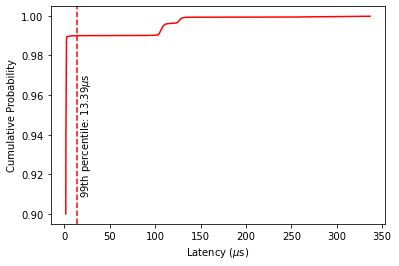

In [7]:
df = pd.read_csv('../logs/latency_ftail_leaf.csv')
fig, ax = percentile_graph(df)
#ax.set_title('CDF of Latency of LeanStore opportunistically using LearnedIndex')
plt.savefig('../logs/latency_cdf_ftail_leaf_zoom.png')

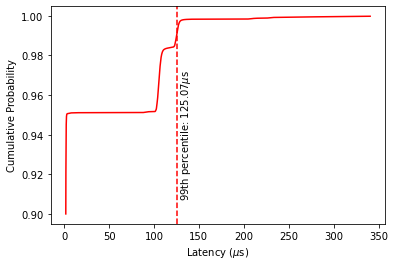

In [8]:
df = pd.read_csv('../logs/latency_sim_leaf.csv')
fig, ax = percentile_graph(df)
#ax.set_title('CDF of Latency of LeanStore')
plt.savefig('../logs/latency_cdf_sim_leaf_zoom.png')

In [8]:
(df.latency/1000).describe()

count    9.999999e+06
mean     6.947181e+00
std      2.966397e+01
min      4.810000e-01
25%      1.025000e+00
50%      1.187000e+00
75%      1.427000e+00
max      8.152055e+03
Name: latency, dtype: float64

# Result
| Approach | 90 percentile |
| -------- | ------------- |
| LeanStore| 125.07 |
| LeanStore using LearnedIndex | 13.39 |
Imporvement = 9.34 times

# Simulated Experiment
- Inner Node Out of Memory with prob 0.01
- Leaf Node In Memory 

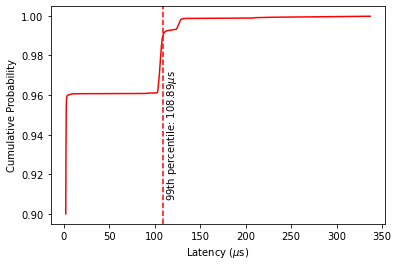

In [13]:
df = pd.read_csv('../logs/simulatelongtail.csv')
fig, ax = percentile_graph(df)
#ax.set_title('CDF of Latency of LeanStore')
plt.savefig('../logs/latency_cdf_simulated_zoom.png')

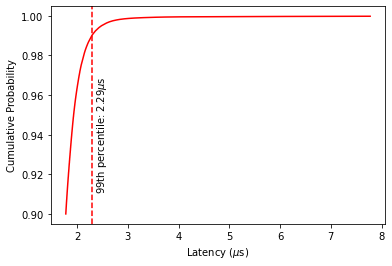

In [6]:
df = pd.read_csv('../logs/ftail2.csv')
fig, ax = percentile_graph(df)
#ax.set_title('CDF of Latency of LeanStore opportunistically using LearnedIndex')
plt.savefig('../logs/latency_cdf_ftail_zoom.png')

# Result
| Approach | 90 percentile |
| -------- | ------------- |
| LeanStore| 108.9 |
| LeanStore using LearnedIndex | 2.29 |
Imporvement =  47.5 times

# Cold BufferPool burst lookup

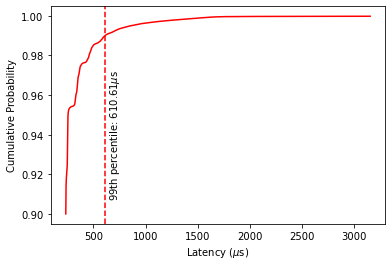

In [10]:
df = pd.read_csv('../logs/latency_org.csv')
fig, ax = percentile_graph(df)
#ax.set_title('CDF of Latency of LeanStore')
plt.savefig('../logs/latency_cdf_org_zoom.png')

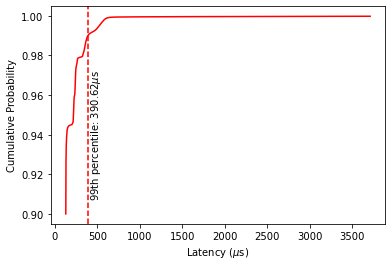

In [12]:
df = pd.read_csv('../logs/latency_seg.csv')
fig, ax = percentile_graph(df)
plt.savefig('../logs/latency_cdf_seg_zoom.png')

# Simulate LeanStore and LearnStore (inner node)

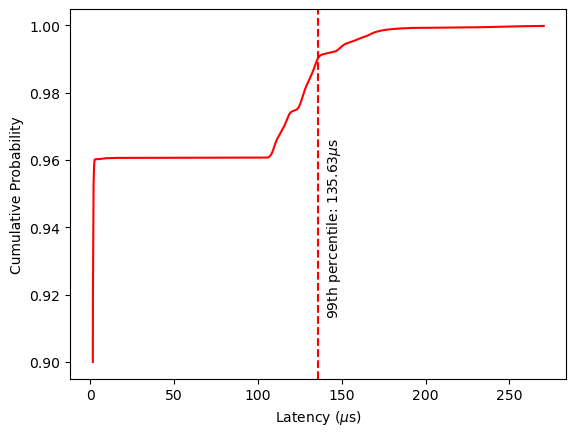

In [9]:
df = pd.read_csv('../logs/longtail/simulateleanstore.csv')
fig, ax = percentile_graph(df)
plt.savefig('../logs/longtail/simulateleanstore.png')

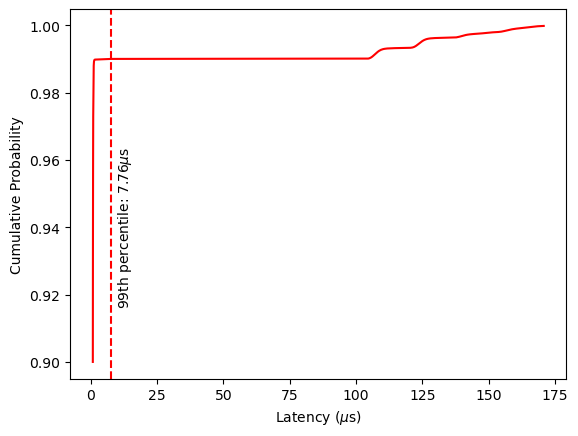

In [10]:
df = pd.read_csv('../logs/longtail/simulatelearnstore.csv')
fig, ax = percentile_graph(df)
plt.savefig('../logs/longtail/simulatelearnstore.png')

# Cold start latency

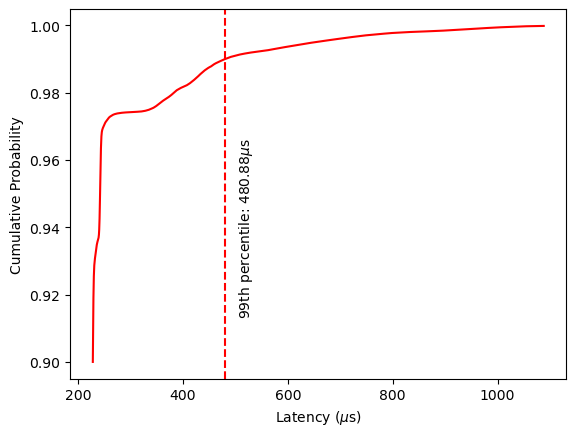

In [8]:
df = pd.read_csv('../logs/longtail/leanstorecold.csv')
fig, ax = percentile_graph(df)
plt.savefig('../logs/longtail/leanstorecold.png')

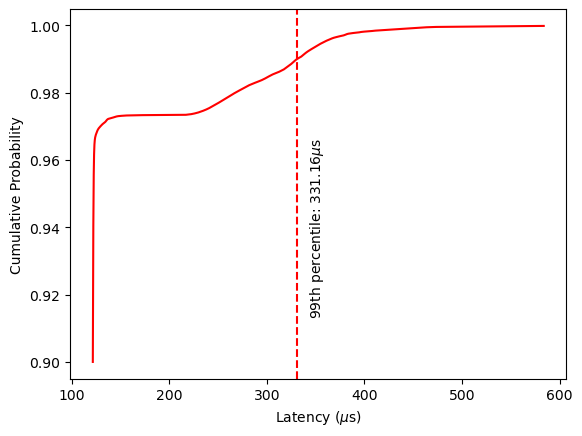

In [9]:
df = pd.read_csv('../logs/longtail/learnstorecold.csv')
fig, ax = percentile_graph(df)
plt.savefig('../logs/longtail/learnstorecold.png')